# BIRD SPECIES CLASSIFICATION with DEEP LEARNING

<p style="text-align:center;"><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR-zuTVRKn8MQ4ZiHcK-WU1QoCzoYw_V7Yh9g&usqp=CAU" alt="Girl in a jacket" width="500" height="600" class="center"></p>

**Project Overview**

It is a project that uses transfer learning to predict 450 classes belonging to bird species. Data set of 400 bird species.58388 training images, 2000 test images(5 images per species) and 2000 validation images(5 images per species. This is a very high quality dataset where there is only one bird in each image and the bird typically takes up at least 50% of the pixels in the image. As a result even a moderatly complex model will achieve training and test accuracies in the mid 90% range.

To become one with data is significant in such projects. Therefore, visualization techniques are usually applied in the project. A pre-trained model of Keras (InceptionV3) is  used in the project. After reachin nearly %89 accuracy, fine-tuning is applied and the accuracy is improved to **%94**.

Steps followed during the development of the project:

* 1. Become One with Data
* 2. Data Preprocessing
* 3. Create a and fit the Model (Using InceptionV3 pre-trained model)
* 4. Freeze top layers of Base Model
* 5. Fine-tuning and Refitting 




## 1. Become one with the data

In [163]:
import os 

#walk through the directory and list the numbers of files
for dirpath, dirnames, filenames in os.walk("/kaggle/input/100-bird-species"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 4 directories and 3 images in /kaggle/input/100-bird-species
There are 450 directories and 0 images in /kaggle/input/100-bird-species/valid
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/DALMATIAN PELICAN
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/WATTLED CURASSOW
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/AMERICAN WIGEON
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/CARMINE BEE-EATER
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/GAMBELS QUAIL
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/UMBRELLA BIRD
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/AMERICAN KESTREL
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/AMERICAN GOLDFINCH
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/DUSKY LORY
There are 0 d

##### How many classes do we have?

In [164]:
num_of_bird_groups = len(os.listdir("/kaggle/input/100-bird-species/train"))
num_of_bird_groups

450

##### What are the class names?

In [165]:
import pathlib 
import numpy as np

data_dir = pathlib.Path("/kaggle/input/100-bird-species/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creating a list of class names from subdirectory 
print(class_names)

['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'ABYSSINIAN GROUND HORNBILL'
 'AFRICAN CROWNED CRANE' 'AFRICAN EMERALD CUCKOO' 'AFRICAN FIREFINCH'
 'AFRICAN OYSTER CATCHER' 'AFRICAN PIED HORNBILL' 'ALBATROSS'
 'ALBERTS TOWHEE' 'ALEXANDRINE PARAKEET' 'ALPINE CHOUGH'
 'ALTAMIRA YELLOWTHROAT' 'AMERICAN AVOCET' 'AMERICAN BITTERN'
 'AMERICAN COOT' 'AMERICAN FLAMINGO' 'AMERICAN GOLDFINCH'
 'AMERICAN KESTREL' 'AMERICAN PIPIT' 'AMERICAN REDSTART' 'AMERICAN WIGEON'
 'AMETHYST WOODSTAR' 'ANDEAN GOOSE' 'ANDEAN LAPWING' 'ANDEAN SISKIN'
 'ANHINGA' 'ANIANIAU' 'ANNAS HUMMINGBIRD' 'ANTBIRD' 'ANTILLEAN EUPHONIA'
 'APAPANE' 'APOSTLEBIRD' 'ARARIPE MANAKIN' 'ASHY STORM PETREL'
 'ASHY THRUSHBIRD' 'ASIAN CRESTED IBIS' 'ASIAN DOLLARD BIRD'
 'AUCKLAND SHAQ' 'AUSTRAL CANASTERO' 'AUSTRALASIAN FIGBIRD' 'AVADAVAT'
 'AZARAS SPINETAIL' 'AZURE BREASTED PITTA' 'AZURE JAY' 'AZURE TANAGER'
 'AZURE TIT' 'BAIKAL TEAL' 'BALD EAGLE' 'BALD IBIS' 'BALI STARLING'
 'BALTIMORE ORIOLE' 'BANANAQUIT' 'BAND TAILED GUAN' 'BANDED BROADBILL'
 'BAN

In [166]:
CLASSES = len (class_names)
CLASSES

450

##### A function to visualize images randomly

In [167]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setting up the image directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Image shape: (224, 224, 3)


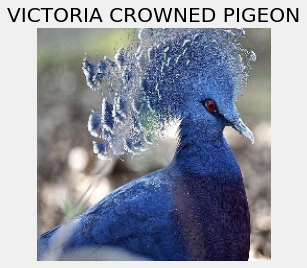

In [168]:
img = view_random_image(target_dir = "/kaggle/input/100-bird-species/train/",
                        target_class = "VICTORIA CROWNED PIGEON") # or we can write nike instead of converse to see converse examples

In [169]:
import tensorflow as tf
img.shape #(width, height, colour channels)

(224, 224, 3)

##### More visualization :D

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)


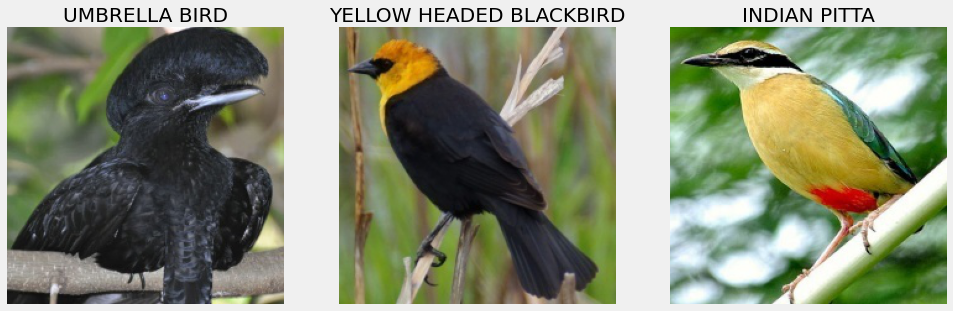

In [170]:
plt.figure(figsize = (15,7))
plt.subplot(1,3,1)
steak_image = view_random_image("/kaggle/input/100-bird-species/train/", "UMBRELLA BIRD")
plt.subplot(1,3,2)
pizza_image = view_random_image("/kaggle/input/100-bird-species/train/", "YELLOW HEADED BLACKBIRD")
plt.subplot(1,3,3)
pizza_image = view_random_image("/kaggle/input/100-bird-species/train/", "INDIAN PITTA")

## 2. Data Preprocessing

In [171]:
import matplotlib.pyplot as plt
import pathlib, os, random
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow as tf
import cv2


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [172]:
train_dir = "/kaggle/input/100-bird-species/train/"
test_dir = "/kaggle/input/100-bird-species/test/"
val_dir = "/kaggle/input/100-bird-species/valid/"

In [173]:
# Rescale
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 64,
                                               target_size= (224,224),
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 64,
                                               target_size = (224,224),
                                               class_mode = "categorical")

val_data = valid_datagen.flow_from_directory(directory = val_dir,
                                               batch_size = 64,
                                               target_size = (224,224),
                                               class_mode = "categorical")


Found 70626 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.


## 3.Creating and fitting the Model

In [174]:
from tensorflow.keras.callbacks import ModelCheckpoint


In [175]:
MODEL_CHECKPOINT_FILEPATH = './Bird-Classifier-Model-Checkpoint.ckpt'

In [176]:
# 1. Create a base model with tf.keras.applications

base_model = tf.keras.applications.InceptionV3(include_top= False,)

# 2. UnFreeze the base model
base_model.trainable = True

#3. Create inputs into models
inputs = tf.keras.layers.Input(shape =(224,224,3), name = "input-layer")

#4. Rescaling
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

#5. Pass the inputs 
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#7. Create the output activation layer
outputs = tf.keras.layers.Dense(450, activation = "softmax", name = "output-layer")(x)

# 8. Combine the inputs with outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

model_checkpoint = ModelCheckpoint(MODEL_CHECKPOINT_FILEPATH,
                                   monitor='val_accuracy',
                                   save_best_only=True,
                                   save_weights_only=True,
                                   verbose=1,
                                   mode = 'max')

callbacks = [model_checkpoint]
history = model_0.fit(train_data,
                                 epochs=15,
                                 steps_per_epoch = len(train_data),
                                 validation_data = val_data,
                                 validation_steps = int(0.25*len(val_data)),
                                  callbacks = [callback])

Shape after passing inputs through base model: (None, 5, 5, 2048)
Shape after GlobalAveragePooling2D: (None, 2048)
Epoch 1/15
1104/1104 [==============================] - 302s 268ms/step - loss: 2.7318 - accuracy: 0.4266 - val_loss: 1.1808 - val_accuracy: 0.6840
Epoch 2/15
1104/1104 [==============================] - 292s 264ms/step - loss: 0.7185 - accuracy: 0.8092 - val_loss: 0.6552 - val_accuracy: 0.8021
Epoch 3/15
1104/1104 [==============================] - 292s 264ms/step - loss: 0.4404 - accuracy: 0.8778 - val_loss: 0.5521 - val_accuracy: 0.8333
Epoch 4/15
1104/1104 [==============================] - 294s 266ms/step - loss: 0.3215 - accuracy: 0.9073 - val_loss: 0.6408 - val_accuracy: 0.8194
Epoch 5/15
1104/1104 [==============================] - 292s 265ms/step - loss: 0.2521 - accuracy: 0.9256 - val_loss: 0.5179 - val_accuracy: 0.8698
Epoch 6/15
1104/1104 [==============================] - 291s 264ms/step - loss: 0.1949 - accuracy: 0.9418 - val_loss: 0.3620 - val_accuracy: 0.90

In [177]:
model_0.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input-layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, None, None, 2048)  21802784  
_________________________________________________________________
global_average_pooling_layer (None, 2048)              0         
_________________________________________________________________
output-layer (Dense)         (None, 450)               922050    
Total params: 22,724,834
Trainable params: 22,690,402
Non-trainable params: 34,432
_________________________________________________________________


In [178]:
model_0.evaluate(test_generator)

2250/2250 [==============================] - 39s 17ms/step - loss: 0.1922 - accuracy: 0.9458


[0.19222402572631836, 0.9457777738571167]

In [179]:
# Load Test Data
test_generator = test_datagen.flow_from_directory(
            '/kaggle/input/100-bird-species/test',
            target_size=(224,224),
            batch_size=1,
            class_mode='categorical',
            shuffle=False
          )

Found 2250 images belonging to 450 classes.


In [180]:
len(test_generator)

2250

In [181]:
# Path test image
img_test = []
for i in sorted (os.listdir(test_dir)):
  bird = os.path.join(test_dir, i)
  for j in sorted(os.listdir(bird)):
    img_test.append (os.path.join(bird, j))

In [182]:
#Predict images
true_labels = []
pred_labels = []
for k in range (len (test_generator)):
  images = img_test [k]
  true_label = np.argmax (test_generator[k][1])
  pred_label = np.argmax (model_0.predict (test_generator[k][0]))
  true_labels.append (true_label)
  pred_labels.append (pred_label)

In [183]:
len (true_labels)

2250

In [184]:
precision = precision_score(true_labels, pred_labels, average='macro')
precision

0.9555634920634922

In [185]:
recall = recall_score(true_labels, pred_labels, average='macro')
recall

0.9457777777777778

In [186]:
2 * (precision * recall) / (precision + recall)

0.9506454526438916

In [187]:
precision_score(true_labels, pred_labels, average='micro')

0.9457777777777778

In [188]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score


In [189]:
print ('Accuracy', accuracy_score(true_labels, pred_labels))
print ('F1-score:', precision_score(true_labels, pred_labels, average='micro')

SyntaxError: unexpected EOF while parsing (1975025446.py, line 2)

In [190]:
from cv2 import cv2_imshow

ImportError: cannot import name 'cv2_imshow' from 'cv2' (/opt/conda/lib/python3.7/site-packages/cv2/__init__.py)

True Label: ABBOTTS BOOBY
Predicted Label: ALBATROSS


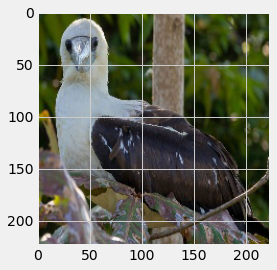

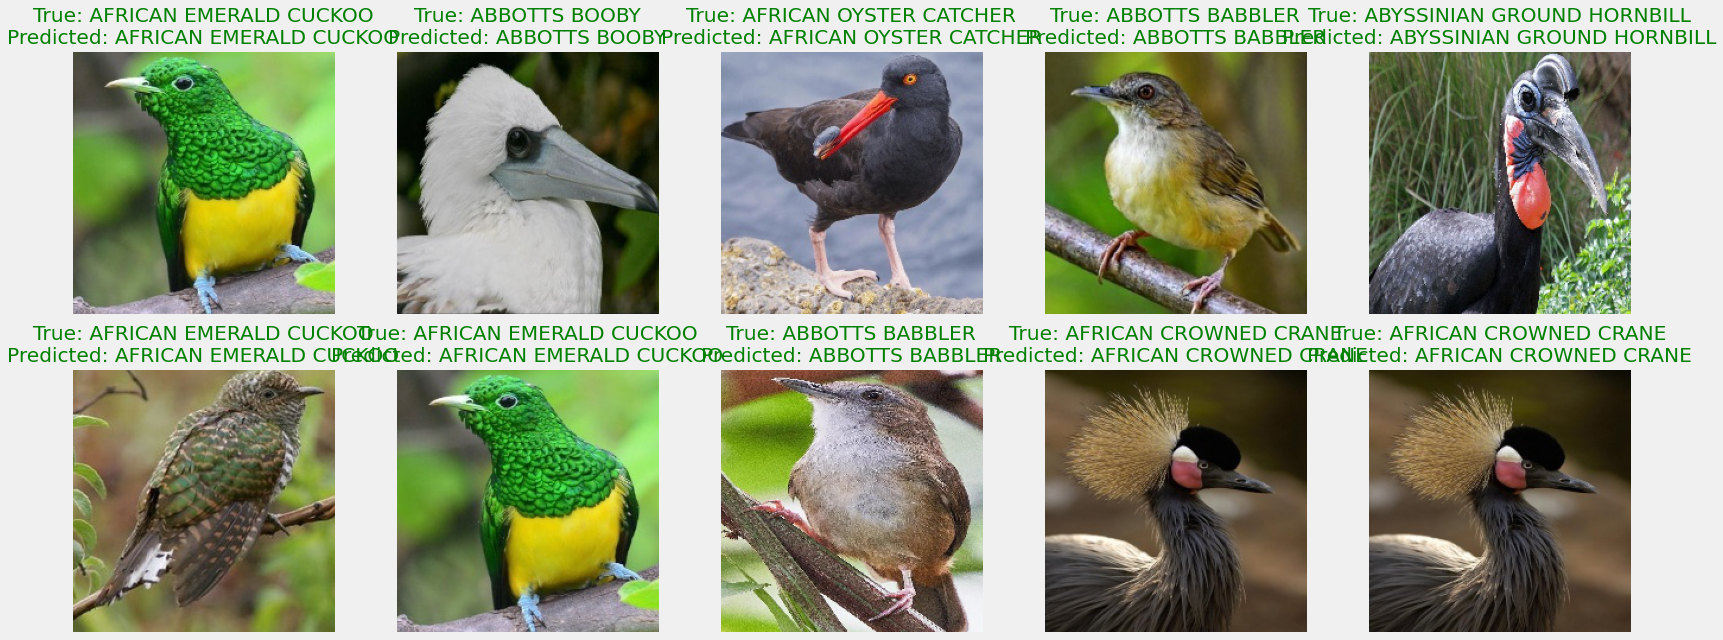

<Figure size 432x288 with 0 Axes>

In [191]:
pred = model_0.predict(test_generator)
pred = np.argmax(pred,axis=1)

index =6

img , label = test_generator[index]
label = test_data.labels[index]
print(f"True Label: {class_names[label]}")
print(f"Predicted Label: {class_names[pred[index]]}")  
plt.imshow(img[0])
plt.show()

# Display 10 random pictures from the dataset with their labels

random_index = np.random.randint(0, len(test_data) - 1, 10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    randImg , randLabel = test_generator[random_index[i]]
    randLabel = test_generator.labels[random_index[i]]
    ax.imshow(randImg[0])
    if class_names[randLabel] == class_names[pred[random_index[i]]]:
      color = "green"
    else:
      color = "red"
    ax.set_title(f"True: {class_names[randLabel]}\nPredicted: {class_names[pred[random_index[i]]]}", color=color)
plt.show()
plt.tight_layout()

In [194]:
# Green: perfect score / Red: imperfect score
for i in range(CLASSES):
    score_sum = 0
    for j in range(5):
        score_sum += int(true_labels[i*5+j] == pred_labels[i*5+j])
    if score_sum == 5:
        print('\033[92m' + '{}: {} / 5'.format(dict_bird_name[i], score_sum))
    else:
        print('\033[91m' + '{}: {} / 5'.format(dict_bird_name[i], score_sum))


ABBOTTS BABBLER: 5 / 5
ABBOTTS BOOBY: 4 / 5
ABYSSINIAN GROUND HORNBILL: 5 / 5
AFRICAN CROWNED CRANE: 5 / 5
AFRICAN EMERALD CUCKOO: 5 / 5
AFRICAN FIREFINCH: 5 / 5
AFRICAN OYSTER CATCHER: 5 / 5
AFRICAN PIED HORNBILL: 5 / 5
ALBATROSS: 5 / 5
ALBERTS TOWHEE: 5 / 5
ALEXANDRINE PARAKEET: 5 / 5
ALPINE CHOUGH: 3 / 5
ALTAMIRA YELLOWTHROAT: 5 / 5
AMERICAN AVOCET: 5 / 5
AMERICAN BITTERN: 5 / 5
AMERICAN COOT: 5 / 5
AMERICAN FLAMINGO: 5 / 5
AMERICAN GOLDFINCH: 5 / 5
AMERICAN KESTREL: 5 / 5
AMERICAN PIPIT: 5 / 5
AMERICAN REDSTART: 4 / 5
AMERICAN WIGEON: 4 / 5
AMETHYST WOODSTAR: 5 / 5
ANDEAN GOOSE: 4 / 5
ANDEAN LAPWING: 5 / 5
ANDEAN SISKIN: 5 / 5
ANHINGA: 5 / 5
ANIANIAU: 5 / 5
ANNAS HUMMINGBIRD: 5 / 5
ANTBIRD: 4 / 5
ANTILLEAN EUPHONIA: 5 / 5
APAPANE: 5 / 5
APOSTLEBIRD: 5 / 5
ARARIPE MANAKIN: 5 / 5
ASHY STORM PETREL: 2 / 5
ASHY THRUSHBIRD: 4 / 5
ASIAN CRESTED IBIS: 5 / 5
ASIAN DOLLARD BIRD: 5 / 5
AUCKLAND SHAQ: 4 / 5
AUSTRAL CANASTERO: 3 / 5
AUSTRALASIAN FIGBIRD: 5 / 5
AVADAVAT: 3 / 5
AZARAS SPINETAIL:

In [195]:
model_0.save('ahhhh.h5')

In [202]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = 'history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv: 
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)